# Q6

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
np.random.seed(2023)

In [2]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split

### Defining Function

In [3]:
x = np.arange(-10, 10, 0.2)
y = 2*np.cos(x)/-np.pi+(2*x)/(2*np.pi)+2*np.cos(3*x)/(-3*np.pi)

### Train-Test Split

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

### Adding with noise

In [5]:
noise_coeff = 0.1
y_train_normal = y_train + noise_coeff*np.random.randn(*y_train.shape)
y_test_normal = y_test + noise_coeff*np.random.randn(*y_test.shape)
y_train_poisson = y_train + noise_coeff*np.random.poisson(2, y_train.shape)
y_test_poisson = y_test + noise_coeff*np.random.poisson(2, y_test.shape)

### Plotting Data

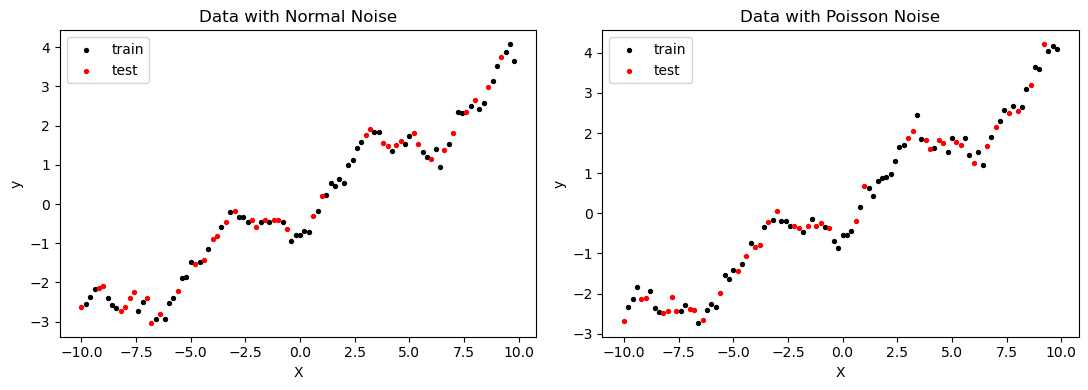

In [6]:
plt.figure(figsize=(11, 4))
plt.subplot(1, 2, 1)
plt.scatter(x_train, y_train_normal, color='black', label='train', s=8)
plt.scatter(x_test, y_test_normal, color='red', label='test', s=8)
plt.legend()
plt.xlabel('X'), plt.ylabel('y'), plt.title('Data with Normal Noise')
plt.subplot(1, 2, 2)
plt.scatter(x_train, y_train_poisson, color='black', label='train', s=8)
plt.scatter(x_test, y_test_poisson, color='red', label='test', s=8)
plt.legend()
plt.xlabel('X'), plt.ylabel('y'), plt.title('Data with Poisson Noise')
plt.tight_layout()
plt.show()

### Fitting Polynomials

In [7]:
coeffs_normal, coeffs_poisson = [], []
for i in range(1, 16):
    coeffs_normal.append(np.polyfit(x_train, y_train_normal, i))
    coeffs_poisson.append(np.polyfit(x_train, y_train_poisson, i))

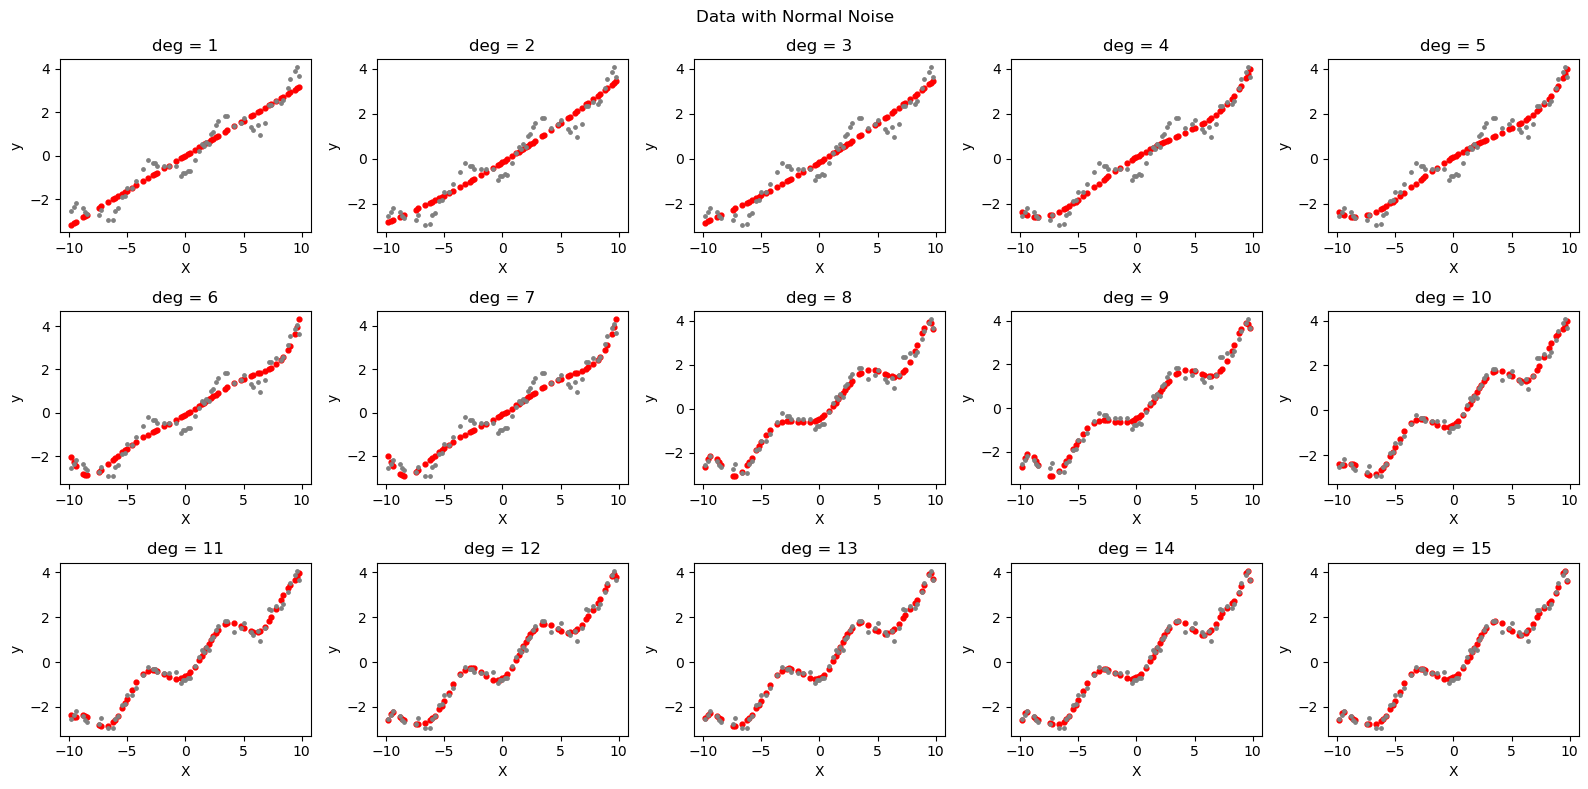

In [8]:
plt.figure(figsize=(16, 8))
for i in range(1, 16):
    plt.subplot(3, 5, i)
    plt.scatter(x_train, np.polyval(coeffs_normal[i-1], x_train), color='red', s=12)
    plt.scatter(x_train, y_train_normal, color='gray', s=6)
    plt.xlabel('X'), plt.ylabel('y'), plt.title(f'deg = {i}')
plt.suptitle('Data with Normal Noise')
plt.tight_layout()
plt.show()

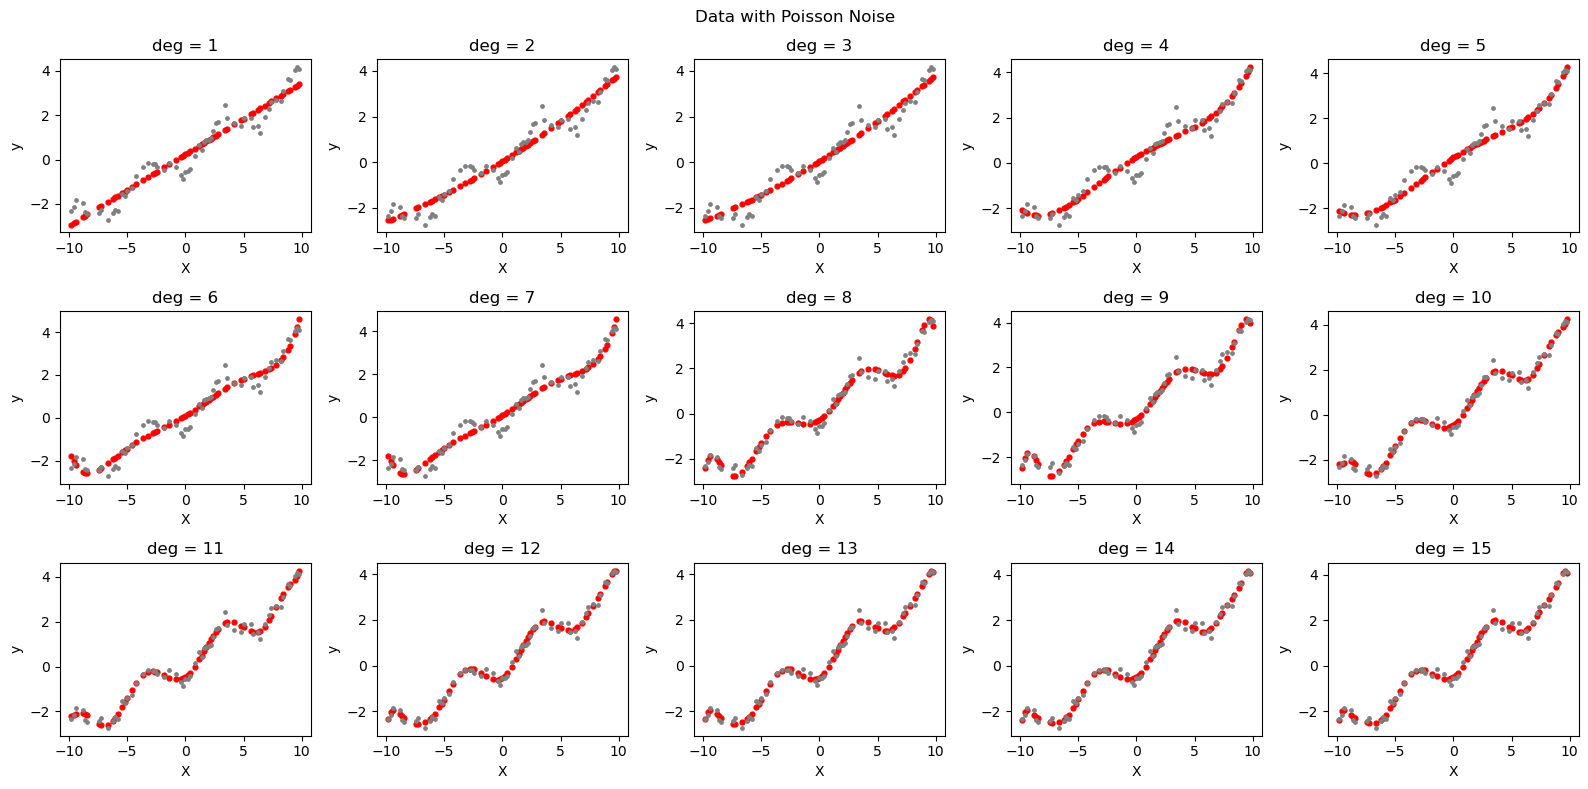

In [9]:
plt.figure(figsize=(16, 8))
for i in range(1, 16):
    plt.subplot(3, 5, i)
    plt.scatter(x_train, np.polyval(coeffs_poisson[i-1], x_train), color='red', s=12)
    plt.scatter(x_train, y_train_poisson, color='gray', s=6)
    plt.xlabel('X'), plt.ylabel('y'), plt.title(f'deg = {i}')
plt.suptitle('Data with Poisson Noise')
plt.tight_layout()
plt.show()

### Reporting MSE Loss

In [10]:
mse_normal, mse_poisson = [], []
print('MSE\t\t\tNormal\t\t\t\tPoisson')
print('\t\ttrain\t\ttest'*2)
for i in range(15):
    print(f'degree {i+1}:', end='\t')
    mse_train_normal = MSE(np.polyval(coeffs_normal[i], x_train), y_train_normal)
    mse_test_normal = MSE(np.polyval(coeffs_normal[i], x_test), y_test_normal)
    mse_normal.append((mse_train_normal, mse_test_normal))
    mse_train_poisson = MSE(np.polyval(coeffs_poisson[i], x_train), y_train_poisson)
    mse_test_poisson = MSE(np.polyval(coeffs_poisson[i], x_test), y_test_poisson)
    mse_poisson.append((mse_train_poisson, mse_test_poisson))
    print('%.3f\t\t%.3f\t\t%.3f\t\t%.3f' % (mse_train_normal, mse_test_normal, mse_train_poisson, mse_test_poisson))

MSE			Normal				Poisson
		train		test		train		test
degree 1:	0.277		0.219		0.280		0.196
degree 2:	0.254		0.222		0.247		0.212
degree 3:	0.254		0.222		0.247		0.212
degree 4:	0.205		0.179		0.204		0.169
degree 5:	0.205		0.179		0.203		0.167
degree 6:	0.181		0.175		0.179		0.164
degree 7:	0.181		0.178		0.179		0.169
degree 8:	0.067		0.086		0.066		0.070
degree 9:	0.067		0.094		0.065		0.082
degree 10:	0.042		0.051		0.041		0.056
degree 11:	0.041		0.054		0.041		0.055
degree 12:	0.031		0.051		0.035		0.043
degree 13:	0.030		0.046		0.034		0.042
degree 14:	0.027		0.058		0.034		0.049
degree 15:	0.027		0.054		0.034		0.051


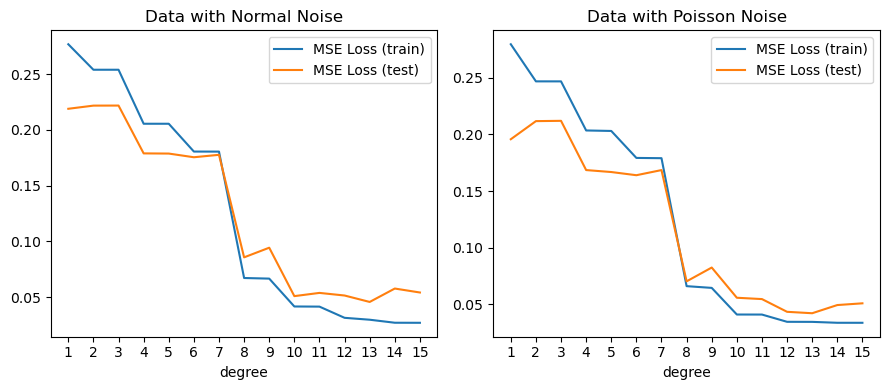

In [11]:
plt.figure(figsize=(9, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, 16), [mse_normal[i][0] for i in range(len(mse_normal))], label='MSE Loss (train)')
plt.plot(range(1, 16), [mse_normal[i][1] for i in range(len(mse_normal))], label='MSE Loss (test)')
plt.title('Data with Normal Noise')
plt.xticks(range(1, 16)), plt.xlabel('degree'), plt.legend()
plt.subplot(1, 2, 2)
plt.plot(range(1, 16), [mse_poisson[i][0] for i in range(len(mse_poisson))], label='MSE Loss (train)')
plt.plot(range(1, 16), [mse_poisson[i][1] for i in range(len(mse_poisson))], label='MSE Loss (test)')
plt.title('Data with Poisson Noise')
plt.xticks(range(1, 16)), plt.xlabel('degree'), plt.legend()
plt.tight_layout()
plt.show()

### Reporting Bias-Variance

In [14]:
def bias_variance_report(x_train, y_train, x_test, y_test):
    degrees = range(1, 16)
    bias_squared = np.zeros(len(degrees))
    variance = np.zeros(len(degrees))

    simulations = 100
    for i in range(simulations):
        for j, degree in enumerate(degrees):
            model = np.poly1d(np.polyfit(x_train, y_train, degree))

            y_train_pred = model(x_train)
            y_test_pred = model(x_test)

            bias_squared[j] += np.mean((y_train - y_train_pred) ** 2)
            variance[j] += np.mean((y_test_pred - np.mean(y_test_pred)) ** 2)

    bias_squared /= simulations
    variance /= simulations
    return degrees, bias_squared, variance

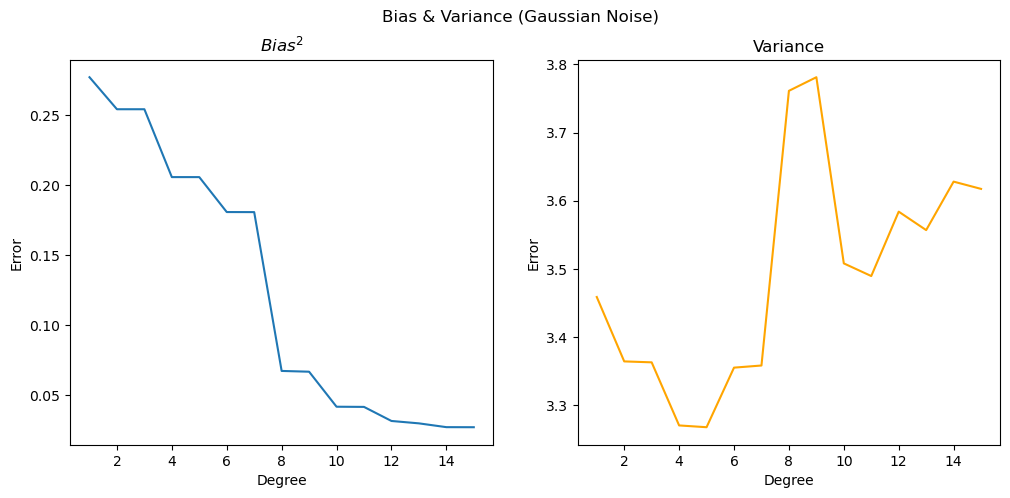

In [15]:
degrees, bias_squared, variance = bias_variance_report(x_train, y_train_normal, x_test, y_test_normal)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(degrees, bias_squared)
plt.title('$Bias^2$')
plt.xlabel('Degree')
plt.ylabel('Error')
plt.subplot(1, 2, 2)
plt.plot(degrees, variance, color='orange')
plt.title('Variance')
plt.xlabel('Degree')
plt.ylabel('Error')
plt.suptitle("Bias & Variance (Gaussian Noise)")
plt.show()

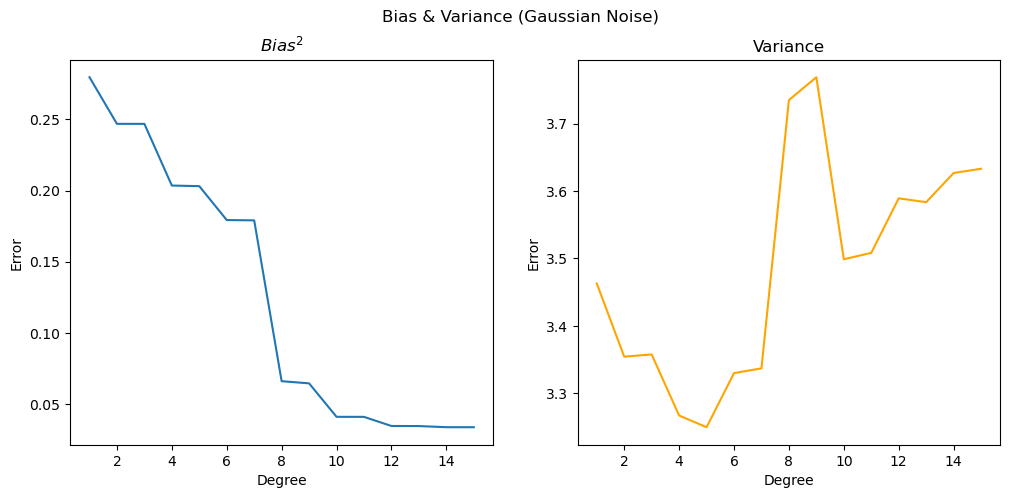

In [16]:
degrees, bias_squared, variance = bias_variance_report(x_train, y_train_poisson, x_test, y_test_poisson)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(degrees, bias_squared)
plt.title('$Bias^2$')
plt.xlabel('Degree')
plt.ylabel('Error')
plt.subplot(1, 2, 2)
plt.plot(degrees, variance, color='orange')
plt.title('Variance')
plt.xlabel('Degree')
plt.ylabel('Error')
plt.suptitle("Bias & Variance (Gaussian Noise)")
plt.show()

# Q7

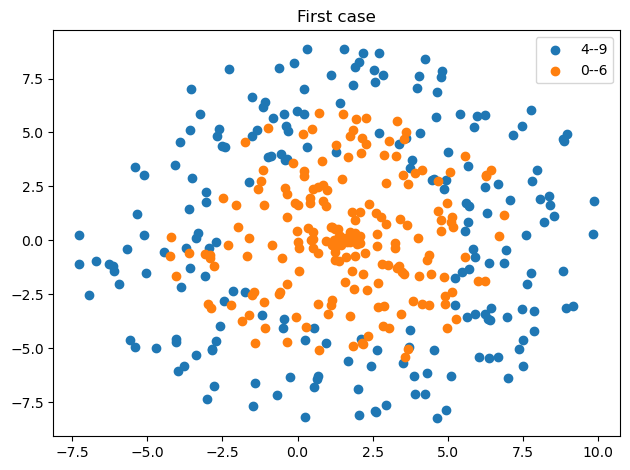

In [12]:
def get_random_points(sample_size, center_x, center_y, radius_1, radius_2):
    np.random.seed(42)
    # Generate 200 random points within circle
    theta = 2 * np.pi * np.random.rand(sample_size)
    r = np.random.uniform(radius_1, radius_2, size=sample_size)
    x = center_x + r * np.cos(theta)
    y = center_y + r * np.sin(theta)
    return x, y

# Display the generated points
x_1, y_1 = get_random_points(200, 1.5, 0, 4, 9)
x_2, y_2 = get_random_points(200, 1.5, 0, 0, 6)

plt.scatter(x_1, y_1, label='4--9')
plt.scatter(x_2, y_2, label='0--6')
plt.title('First case')
plt.legend()
plt.tight_layout()
plt.show()

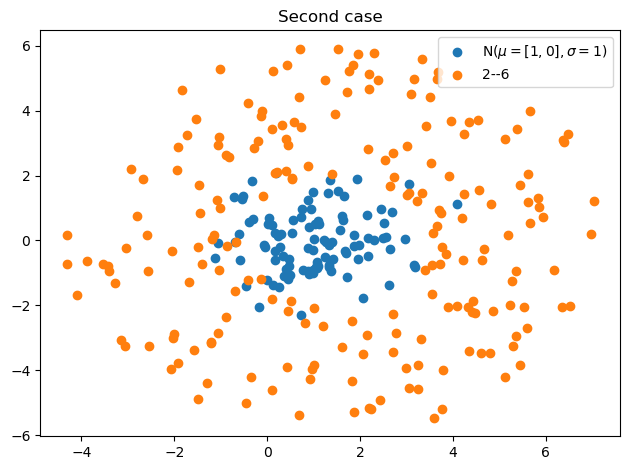

In [13]:
mean = [1, 0]
std = 1
points = np.random.normal(loc=mean, scale=std, size=(100, 2))

x_3, y_3 = get_random_points(200, 1.5, 0, 2, 6)
plt.scatter(points[:, 0], points[:, 1], label='N($\mu=[1, 0], \sigma=1$)')
plt.scatter(x_3, y_3, label='2--6')
plt.title('Second case')
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
class LogisticRegression():
    def __init__(self, degree, learning_rate, iterations, Lambda):
        self.degree = degree
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.Lambda = Lambda
        
    def transform(self, X):
        X_transformed = []
        x1 = X[:, 0].reshape(X.shape[0], 1)
        x2 = X[:, 1].reshape(X.shape[0], 1)
        for i in range(1, self.degree + 1):
            for j in range(0, i + 1):
                power_x1 = i - j
                power_x2 = j
                X_transformed.append((x1 ** power_x1) * (x2 ** power_x2))  
        return np.squeeze(np.array(X_transformed)).T
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
        
    def h_theta(self, X, theta):
        z = X.dot(theta)
        return self.sigmoid(z)

    def scale_features(self, X, mode='train'):
        if mode == 'train':
            self.mean = np.mean(X, axis = 0) 
            self.sd = np.std(X, axis = 0) 
        X_scaled = (X-self.mean)/self.sd
        return X_scaled
    
    def batch_gradient_descent(self):
        m = len(self.X_train)
        theta = np.zeros((self.X_train.shape[1], 1))
        for iteration in range(self.iterations):
            gradients = 1 / m * (self.X_train.T.dot(self.h_theta(self.X_train, theta) - self.y_train) + self.Lambda * theta)
            theta -= self.learning_rate * gradients
        return theta
    
    def fit(self, X_train, y_train):
        X_transformed = self.transform(X_train)
        X_scaled = self.scale_features(X_transformed)
        self.X_train = np.hstack((np.ones((X_scaled.shape[0], 1)), X_scaled))
        self.y_train = y_train
        self.theta = self.batch_gradient_descent()
        
    def predict(self, X_test):
        X_transformed = self.transform(X_test)
        X_scaled = self.scale_features(X_transformed, mode='test')
        X_test = np.hstack((np.ones((X_scaled.shape[0], 1)), X_scaled))
        return np.where(self.h_theta(X_test, self.theta) > 0.5, 1.0, 0.0)

## First Case

In [27]:
X = np.hstack((np.vstack((x_1, y_1)), np.vstack((x_2, y_2)))).T
y = np.vstack((np.ones((200, 1)), np.zeros((200, 1))))

In [28]:
X.shape, y.shape

((400, 2), (400, 1))

In [29]:
idx = np.random.choice(range(400), 50, replace=False)
X_test = X[idx]
y_test = y[idx]
idx = list(set(list(range(400)))-set(idx))
X_train = X[idx]
y_train = y[idx]

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((350, 2), (50, 2), (350, 1), (50, 1))

In [31]:
models = []
for deg in range(1, 10):
    print(f'degree {deg}: ', end='')
    model = LogisticRegression(deg, 0.01, 5000, 0.001)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    models.append(model)
    acc = (y_pred == y_test).sum()/len(y_test)*100
    print(f'{acc}%')

degree 1: 64.0%
degree 2: 92.0%
degree 3: 92.0%
degree 4: 92.0%
degree 5: 92.0%
degree 6: 92.0%
degree 7: 92.0%
degree 8: 92.0%
degree 9: 92.0%


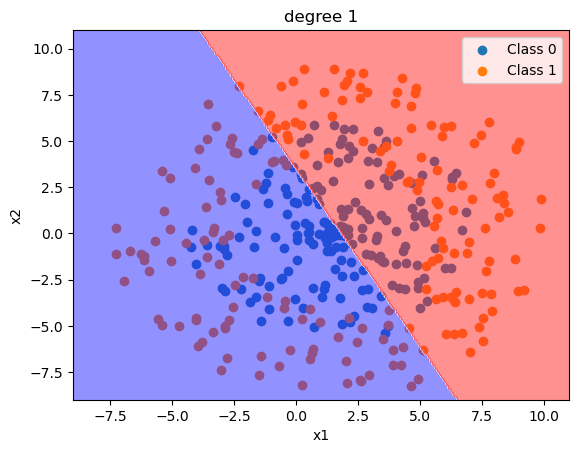

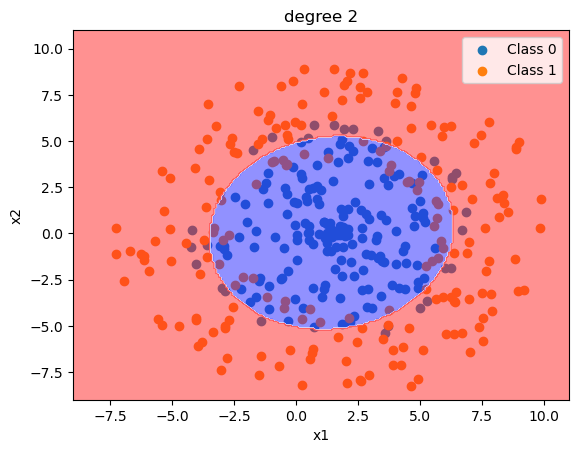

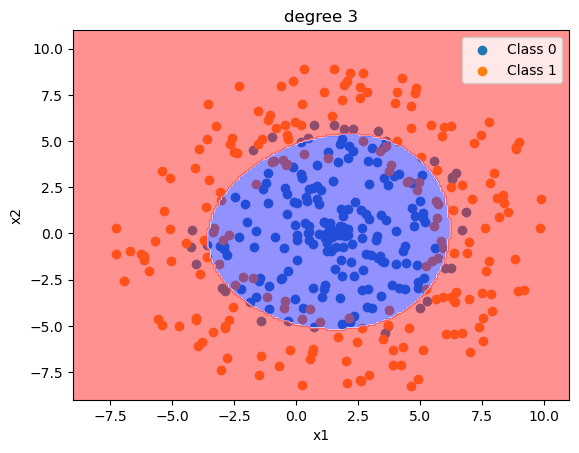

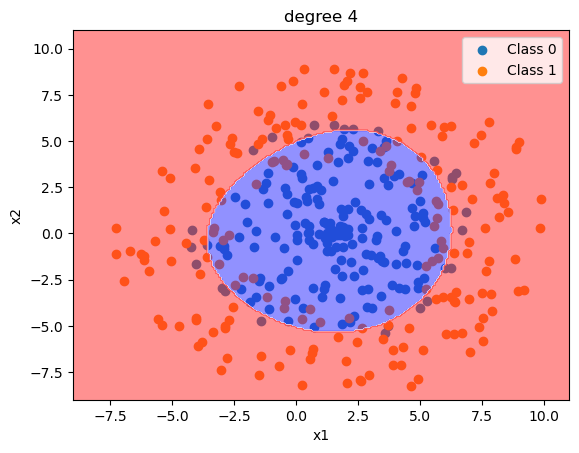

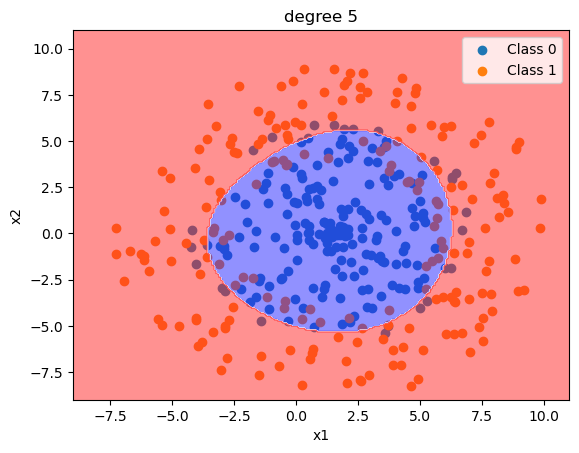

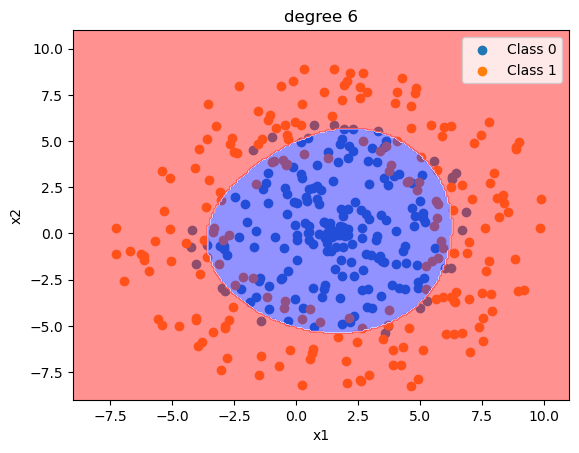

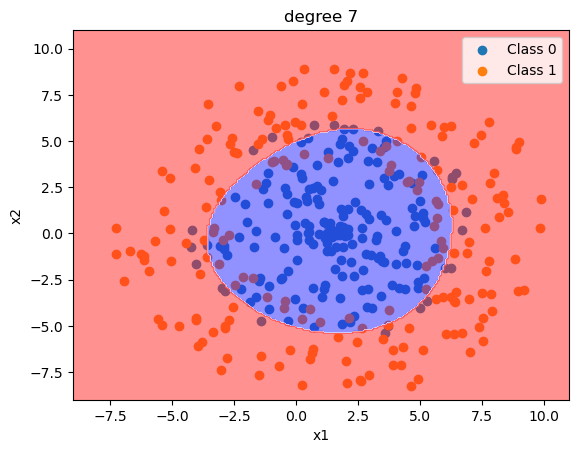

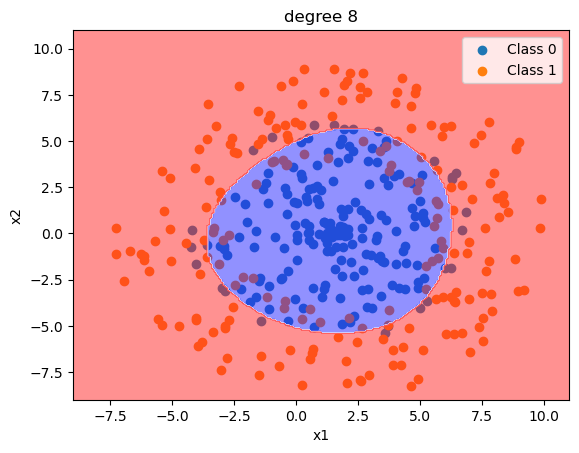

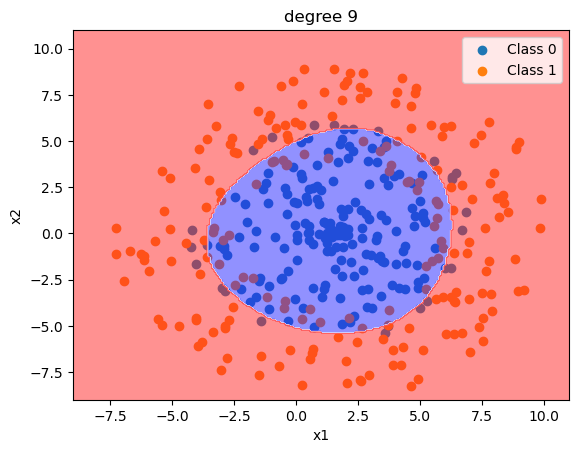

In [32]:
for deg in range(9):
    model = models[deg]
    x1grid = np.linspace(-9, 11, 220)
    x2grid = np.linspace(-9, 11, 220)
    x1, x2 = np.meshgrid(x1grid, x2grid)
    x1, x2 = x1.flatten().reshape((-1, 1)), x2.flatten().reshape((-1, 1))
    grid = np.hstack((x1, x2))
    U = x1.reshape((len(x1grid), len(x2grid)))
    V = x2.reshape((len(x1grid), len(x2grid)))
    Z = model.predict(grid).reshape((len(x1grid), len(x2grid)))
    mask0 = (y == 0).reshape(-1)
    mask1 = (y == 1).reshape(-1)
    plt.scatter(X[mask0, :][:, 0], X[mask0][:, 1], label='Class 0')
    plt.scatter(X[mask1, :][:, 0], X[mask1][:, 1], label='Class 1')
    plt.contourf(U, V, Z, cmap='bwr', alpha=0.5)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'degree {deg+1}')
    plt.legend()
    plt.show()

## Second Case

In [21]:
X = np.hstack((np.vstack((points[:,0], points[:,1])), np.vstack((x_3, y_3)))).T
y = np.vstack((np.ones((100, 1)), np.zeros((200, 1))))

In [22]:
X.shape, y.shape

((300, 2), (300, 1))

In [23]:
idx = np.random.choice(range(300), 40, replace=False)
X_test = X[idx]
y_test = y[idx]
idx = list(set(list(range(300)))-set(idx))
X_train = X[idx]
y_train = y[idx]

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((260, 2), (40, 2), (260, 1), (40, 1))

In [25]:
models = []
for deg in range(1, 10):
    print(f'degree {deg}: ', end='')
    model = LogisticRegression(deg, 0.01, 5000, 0.001)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    models.append(model)
    acc = (y_pred == y_test).sum()/len(y_test)*100
    print(f'{acc}%')

degree 1: 75.0%
degree 2: 92.5%
degree 3: 92.5%
degree 4: 92.5%
degree 5: 92.5%
degree 6: 92.5%
degree 7: 92.5%
degree 8: 92.5%
degree 9: 92.5%


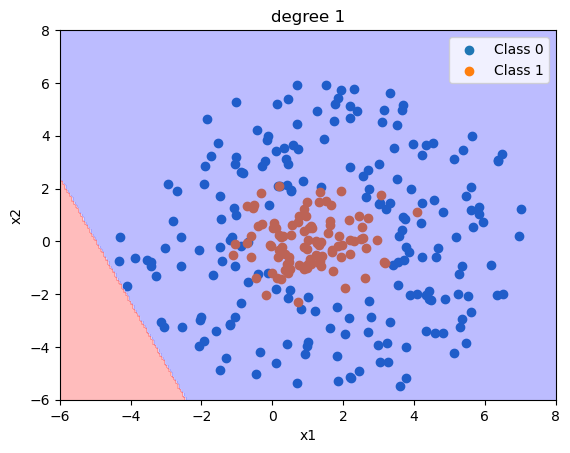

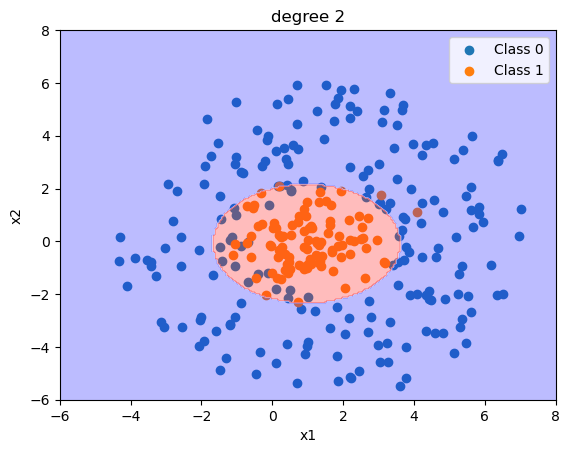

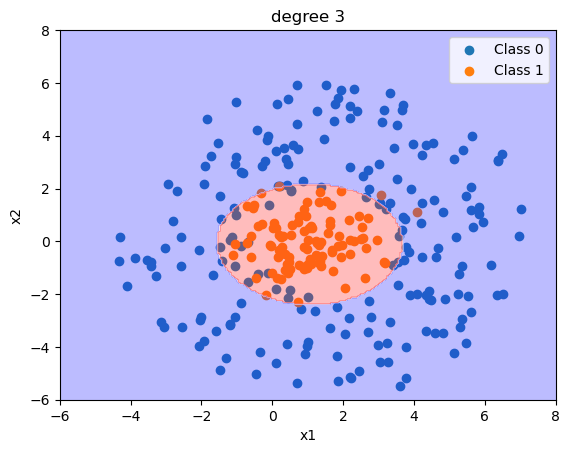

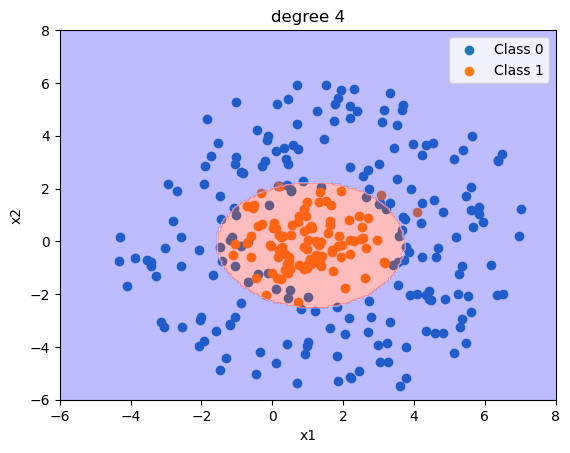

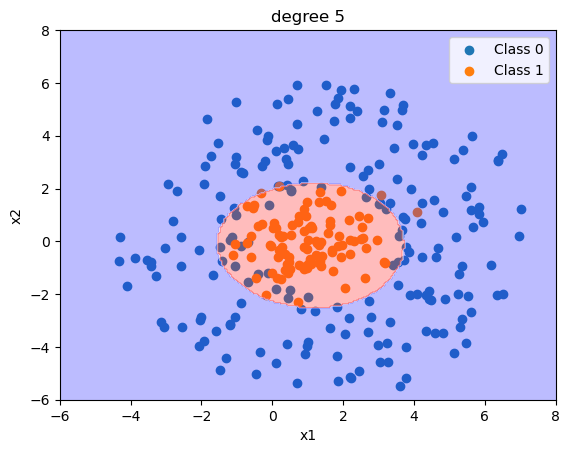

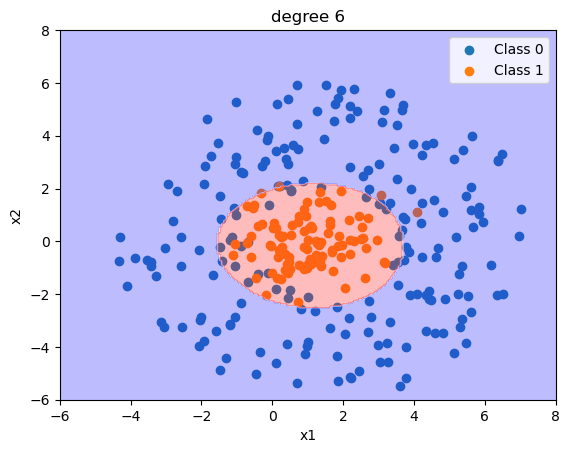

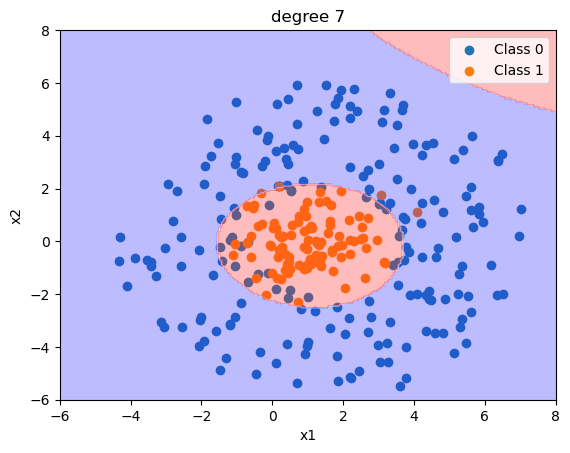

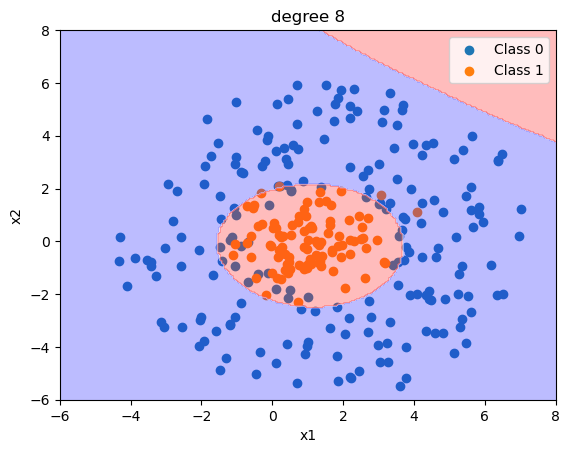

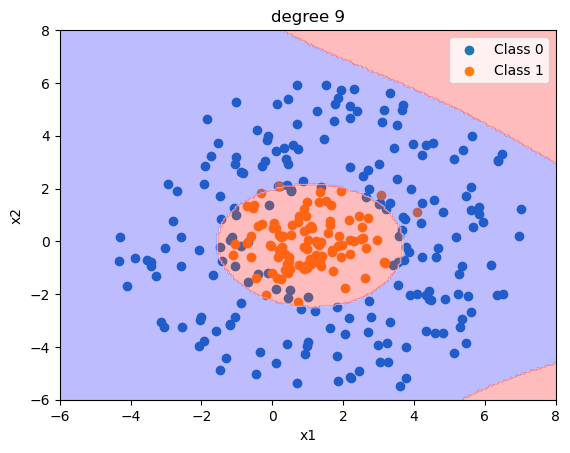

In [26]:
for deg in range(9):
    model = models[deg]
    x1grid = np.linspace(-6, 8, 220)
    x2grid = np.linspace(-6, 8, 220)
    x1, x2 = np.meshgrid(x1grid, x2grid)
    x1, x2 = x1.flatten().reshape((-1, 1)), x2.flatten().reshape((-1, 1))
    grid = np.hstack((x1, x2))
    U = x1.reshape((len(x1grid), len(x2grid)))
    V = x2.reshape((len(x1grid), len(x2grid)))
    Z = model.predict(grid).reshape((len(x1grid), len(x2grid)))
    mask0 = (y == 0).reshape(-1)
    mask1 = (y == 1).reshape(-1)
    plt.scatter(X[mask0, :][:, 0], X[mask0][:, 1], label='Class 0')
    plt.scatter(X[mask1, :][:, 0], X[mask1][:, 1], label='Class 1')
    plt.contourf(U, V, Z, cmap='bwr', alpha=0.3)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'degree {deg+1}')
    plt.legend()
    plt.show()

# Q8

In [17]:
import pandas as pd

In [18]:
df = pd.read_csv('ted_main.csv')
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [21]:
df.describe()

,comments,duration,film_date,languages,num_speaker,published_date,views
count,2550.000000,2550.000000,2.550000e+03,2550.000000,2550.000000,2.550000e+03,2.550000e+03
mean,191.562353,826.510196,1.321928e+09,27.326275,1.028235,1.343525e+09,1.698297e+06
std,282.315223,374.009138,1.197391e+08,9.563452,0.207705,9.464009e+07,2.498479e+06
min,2.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,5.044300e+04
25%,63.000000,577.000000,1.257466e+09,23.000000,1.000000,1.268463e+09,7.557928e+05
50%,118.000000,848.000000,1.333238e+09,28.000000,1.000000,1.340935e+09,1.124524e+06
75%,221.750000,1046.750000,1.412964e+09,33.000000,1.000000,1.423432e+09,1.700760e+06
max,6404.000000,5256.000000,1.503792e+09,72.000000,5.000000,1.506092e+09,4.722711e+07


In [37]:
duration = df['duration']
duration

0       1164
1        977
2       1286
3       1116
4       1190
        ... 
2545     476
2546     290
2547     651
2548    1100
2549     519
Name: duration, Length: 2550, dtype: int64

In [25]:
estimation = [0, 0, 0, 0]
Vn = [10, 20, 50, 100]

def gaussian_kernel(x):
    return 1/(np.sqrt(2*np.pi)) * np.exp(-x**2/2)

def fit_parzen(xi, Vn, x):
    estimation = 0
    for i in range(len(xi)):
        estimation+= 1/len(xi)*1/Vn * gaussian_kernel((x - xi[i])/Vn)
    return estimation

In [ ]:
for i in range(len(Vn)):
    estimation[i] = fit_parzen(duration.to_numpy(), Vn[i], np.linspace(100, 6000, 100000))

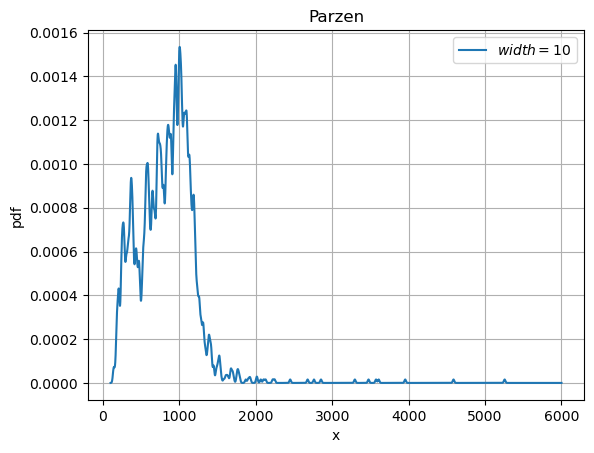

In [31]:
plt.plot(np.linspace(100, 6000, 100000), estimation[0], label="$width=10$")
plt.title("Parzen"), plt.xlabel("x"), plt.ylabel("pdf")
plt.legend()
plt.grid()
plt.show()

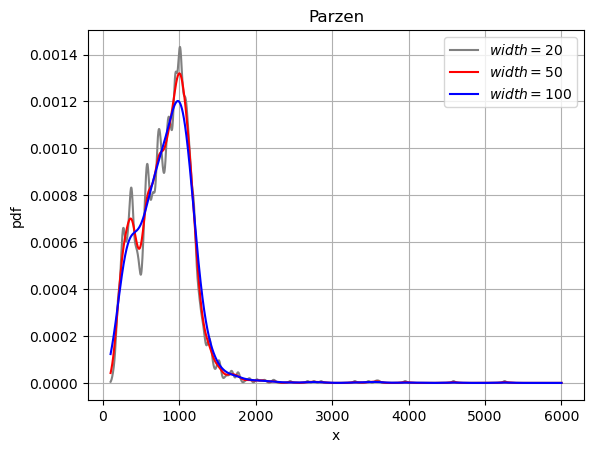

In [34]:
plt.plot(np.linspace(100, 6000, 100000), estimation[1], label="$width=20$", color='gray')
plt.plot(np.linspace(100, 6000, 100000), estimation[2], label="$width=50$", color='red')
plt.plot(np.linspace(100, 6000, 100000), estimation[3], label="$width=100$", color='blue')
plt.title("Parzen"), plt.xlabel("x"), plt.ylabel("pdf")
plt.legend()
plt.grid()
plt.show()

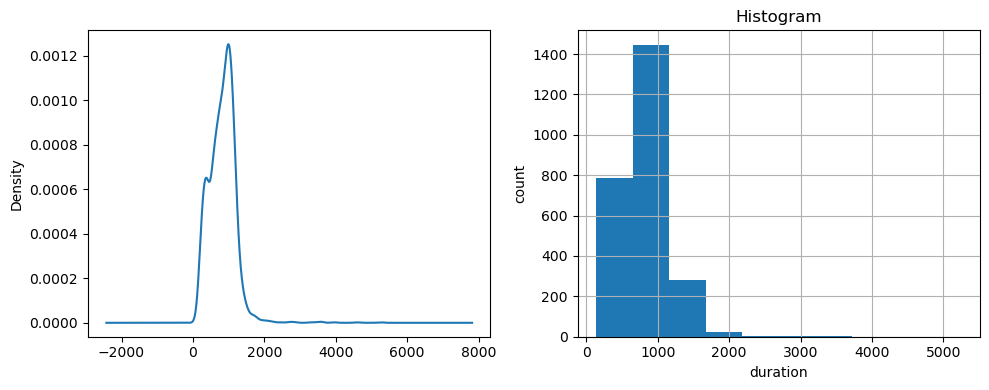

In [22]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
duration.plot(kind='density')
plt.subplot(1,2,2)
duration.hist()
plt.ylabel('count'), plt.xlabel('duration'), plt.title('Histogram')
plt.tight_layout()
plt.show()

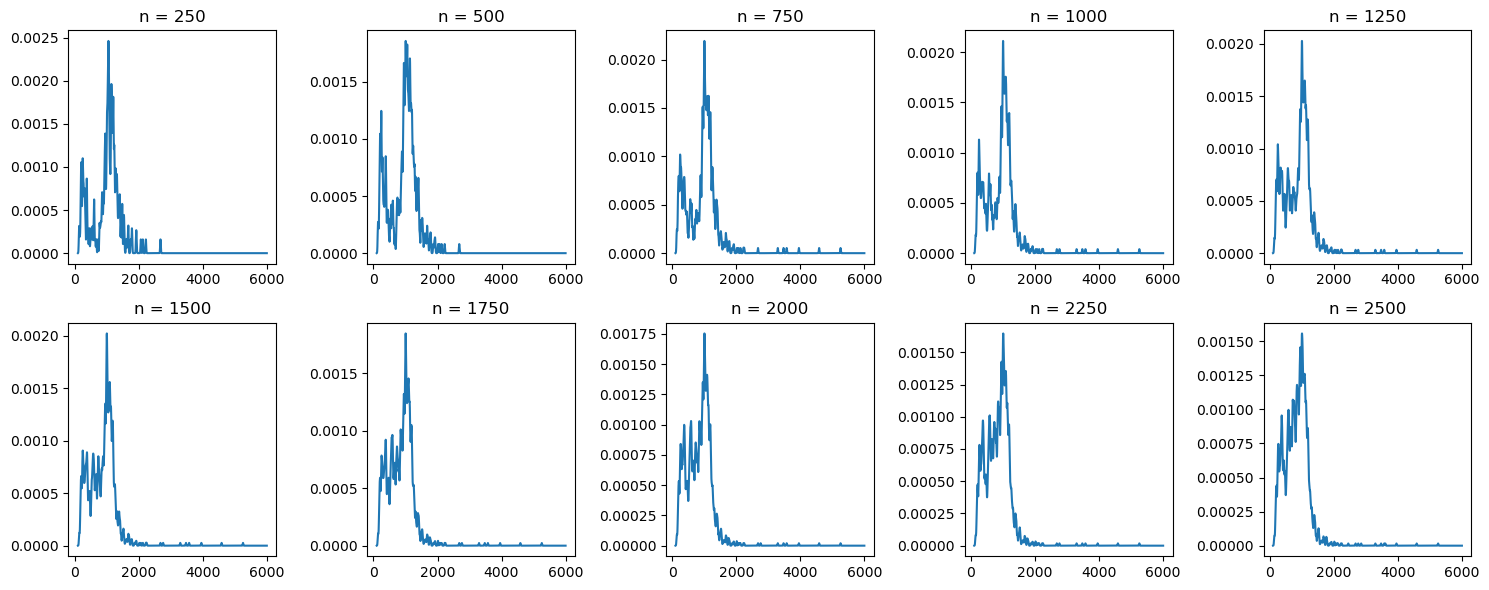

In [43]:
plt.figure(figsize=(15, 6))
x = np.linspace(100, 6000, 100000)
d = duration.to_numpy()
for n in range(250, len(duration), 250):
    estimation = fit_parzen(d[:n], Vn[0], x)
    plt.subplot(2, 5, n//250)
    plt.plot(x, estimation)
    plt.title(f"n = {n}")
plt.tight_layout()
plt.show()

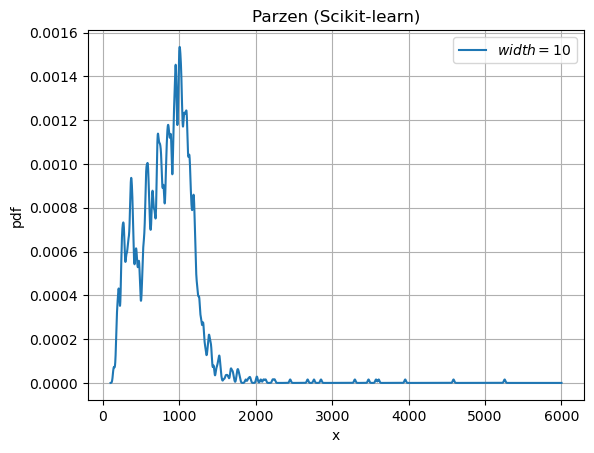

In [44]:
from sklearn.neighbors import KernelDensity

kde = KernelDensity(kernel='gaussian', bandwidth=Vn[0])
kde.fit(d.reshape((-1, 1)))
log_density = kde.score_samples(x[:, np.newaxis])
plt.plot(x, np.exp(log_density), label="$width=10$")
plt.title("Parzen (Scikit-learn)")
plt.xlabel("x"), plt.ylabel("pdf")
plt.legend()
plt.grid()
plt.show()